<a href="https://colab.research.google.com/github/ZerihunWaje/Data-Analytics-projects/blob/main/K_Nearest_Neighbor_Classifaction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd

In [5]:
url='https://raw.githubusercontent.com/ZerihunWaje/Machine-learning-projects/main/Dataset.csv'
df=pd.read_csv(url)

In [6]:
print(df)

       Age  Income Student Credit_rating Buy_computer
0    young    high      no          fair           no
1    young    high      no     excellent           no
2   middle    high      no          fair          yes
3      old  medium      no          fair          yes
4      old     low     yes          fair          yes
5      old     low     yes     excellent           no
6   middle     low     yes     excellent          yes
7    young  medium      no          fair           no
8    young     low     yes          fair          yes
9      old  medium     yes          fair          yes
10   young  medium     yes     excellent          yes
11  middle  medium      no     excellent          yes
12  middle    high     yes          fair          yes
13     old  medium      no     excellent           no


In [7]:
df.describe()

,Age,Income,Student,Credit_rating,Buy_computer
count,14,14,14,14,14
unique,3,3,2,2,2
top,young,medium,no,fair,yes
freq,5,6,7,8,9


In [8]:
data_age={'young':0,'middle':1,'old':2}
data_income={'high':2,'medium':1,'low':0}
data_student={'no':0,'yes':1}
data_cr={'fair':0,'excellent':1}
data_buy_computer={'no':0,'yes':1}

In [9]:
df['Age']=df['Age'].map(data_age)
df['Income']=df['Income'].map(data_income)
df['Student']=df['Student'].map(data_student)
df['Credit_rating']=df['Credit_rating'].map(data_cr)
df['Buy_computer']=df['Buy_computer'].map(data_buy_computer)

In [10]:
print(df)

    Age  Income  Student  Credit_rating  Buy_computer
0     0       2        0              0             0
1     0       2        0              1             0
2     1       2        0              0             1
3     2       1        0              0             1
4     2       0        1              0             1
5     2       0        1              1             0
6     1       0        1              1             1
7     0       1        0              0             0
8     0       0        1              0             1
9     2       1        1              0             1
10    0       1        1              1             1
11    1       1        0              1             1
12    1       2        1              0             1
13    2       1        0              1             0


In [30]:
features=['Age','Income','Student','Credit_rating']
data=df[features]
classes=df['Buy_computer']

In [31]:
from sklearn.neighbors import KNeighborsClassifier

In [32]:
knn=KNeighborsClassifier(n_neighbors=2)

In [33]:
knn.fit(data,classes)

KNeighborsClassifier(n_neighbors=2)

In [34]:
url='https://raw.githubusercontent.com/ZerihunWaje/Machine-learning-projects/main/dataset2.csv'
df_validation=pd.read_csv(url)

In [35]:
print(df_validation)

       Age Income Student Credit_rating Buy_computer
0      old    low     yes          fair          yes
1      old   high      no          fair          yes
2    young    low      no     excellent           no
3   middle    low      no          fair           no
4      old    low     yes     excellent           no
5    young   high     yes     excellent          yes
6    young   high      no          fair          yes
7    young    low     yes          fair           no
8   middle   high     yes     excellent           no
9    young   high      no          fair          yes
10     old    low      no     excellent           no


In [36]:
d_data_age={'young':0,'middle':1,'old':2}
d_data_income={'high':0,'medium':1,'low':2}
d_data_student={'no':0,'yes':1}
d_data_cr={'fair':0,'excellent':1}
d_data_buy_computer={'no':0,'yes':1}

In [37]:
df_validation['Age']=df_validation['Age'].map(d_data_age)
df_validation['Income']=df_validation['Income'].map(d_data_income)
df_validation['Student']=df_validation['Student'].map(d_data_student)
df_validation['Credit_rating']=df_validation['Credit_rating'].map(d_data_cr)
df_validation['Buy_computer']=df_validation['Buy_computer'].map(d_data_buy_computer)

In [38]:
features=['Age','Income','Student','Credit_rating']
test_df=df_validation[features]
print(test_df)

    Age  Income  Student  Credit_rating
0     2       2        1              0
1     2       0        0              0
2     0       2        0              1
3     1       2        0              0
4     2       2        1              1
5     0       0        1              1
6     0       0        0              0
7     0       2        1              0
8     1       0        1              1
9     0       0        0              0
10    2       2        0              1


In [39]:
predicted_class=list(knn.predict(test_df))
print(predicted_class)

[1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0]


In [40]:
actual_classes = df_validation['Buy_computer'].values.tolist()

print(actual_classes)

[1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0]


In [41]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(actual_classes, predicted_class)

In [42]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

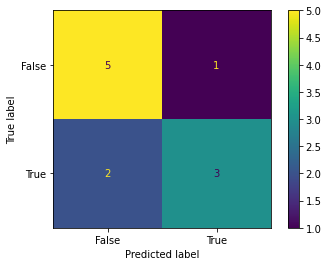

In [43]:
import matplotlib.pyplot as plt
cm_display.plot()
plt.show()

In [44]:
Accuracy = metrics.accuracy_score(actual_classes, predicted_class)
print(Accuracy)

0.7272727272727273


In [46]:
Precision = metrics.precision_score(actual_classes, predicted_class)
print(Precision)

0.75


In [47]:
Sensitivity_recall = metrics.recall_score(actual_classes, predicted_class)
print(Sensitivity_recall)

0.6


In [49]:
Specificity = metrics.recall_score(actual_classes, predicted_class, pos_label=0)
print(Specificity)

0.8333333333333334


In [51]:
F1_score = metrics.f1_score(actual_classes, predicted_class)
print(F1_score)

0.6666666666666665


In [52]:
print({"Accuracy":Accuracy,"Precision":Precision,"Sensitivity_recall":Sensitivity_recall,"Specificity":Specificity,"F1_score":F1_score})

{'Accuracy': 0.7272727272727273, 'Precision': 0.75, 'Sensitivity_recall': 0.6, 'Specificity': 0.8333333333333334, 'F1_score': 0.6666666666666665}


In [53]:
data = df.values.tolist()

In [54]:
print(data)

[[0, 2, 0, 0, 0], [0, 2, 0, 1, 0], [1, 2, 0, 0, 1], [2, 1, 0, 0, 1], [2, 0, 1, 0, 1], [2, 0, 1, 1, 0], [1, 0, 1, 1, 1], [0, 1, 0, 0, 0], [0, 0, 1, 0, 1], [2, 1, 1, 0, 1], [0, 1, 1, 1, 1], [1, 1, 0, 1, 1], [1, 2, 1, 0, 1], [2, 1, 0, 1, 0]]
